In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np



2025-05-01 14:41:59.306626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746110519.478692      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746110519.526684      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv("/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv")

In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df[df.columns[2:]].iloc[3]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 3, dtype: int64

In [6]:
!pip list

Package                            Version             Editable project location
---------------------------------- ------------------- -------------------------
absl-py                            1.4.0
accelerate                         1.3.0
aiofiles                           22.1.0
aiohappyeyeballs                   2.6.1
aiohttp                            3.11.16
aiosignal                          1.3.2
aiosqlite                          0.21.0
alabaster                          1.0.0
albucore                           0.0.23
albumentations                     2.0.4
ale-py                             0.10.1
alembic                            1.15.2
altair                             5.5.0
annotated-types                    0.7.0
annoy                              1.17.3
ansicolors                         1.1.8
antlr4-python3-runtime             4.9.3
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
args    

In [7]:
from tensorflow.keras.layers import TextVectorization
df['comment_text']

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [8]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [9]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [10]:
x = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
MAX_FEATURES = 200000 #number of words in the vocab

In [12]:
vectorizer = TextVectorization(max_tokens = MAX_FEATURES,
                             output_sequence_length = 1800,
                             output_mode = 'int') # MAX_FEATURES-> NUmber of words in the vocabulary
                                                  #output_seq_length -> Max length of the sentences
                                                   # Output mode -> output data type 

I0000 00:00:1746110535.663446      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [13]:
vectorizer.adapt(x.values)

In [14]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'the',
 'to',
 'of',
 'and',
 'a',
 'you',
 'i',
 'is',
 'that',
 'in',
 'it',
 'for',
 'this',
 'not',
 'on',
 'be',
 'as',
 'have',
 'are',
 'your',
 'with',
 'if',
 'article',
 'was',
 'or',
 'but',
 'page',
 'my',
 'an',
 'from',
 'by',
 'do',
 'at',
 'about',
 'me',
 'so',
 'wikipedia',
 'can',
 'what',
 'there',
 'all',
 'has',
 'will',
 'talk',
 'please',
 'would',
 'its',
 'no',
 'one',
 'just',
 'like',
 'they',
 'he',
 'dont',
 'which',
 'any',
 'been',
 'should',
 'more',
 'we',
 'some',
 'other',
 'who',
 'see',
 'here',
 'also',
 'his',
 'think',
 'im',
 'because',
 'know',
 'how',
 'am',
 'people',
 'why',
 'edit',
 'articles',
 'only',
 'out',
 'up',
 'when',
 'were',
 'use',
 'then',
 'may',
 'time',
 'did',
 'them',
 'now',
 'being',
 'their',
 'than',
 'thanks',
 'even',
 'get',
 'make',
 'good',
 'had',
 'very',
 'information',
 'does',
 'could',
 'well',
 'want',
 'such',
 'sources',
 'way',
 'name',
 'these',
 'deletion',
 'pages',
 'first',
 'help'

In [15]:
vectorized_text = vectorizer(x.values)

In [16]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [17]:
 dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
 dataset = dataset.cache()
 dataset = dataset.shuffle(160000)
 dataset = dataset.batch(16)
 dataset = dataset.prefetch(8)

In [18]:
batch_x , batch_y = dataset.as_numpy_iterator().next()

In [19]:
# Train, validation, and test dataset splitting
train = dataset.take(int(len(dataset) * .7))
val = dataset.skip(int(len(dataset) * .7)).take(int(len(dataset) * .2))
test = dataset.skip(int(len(dataset) * .9)).take(int(len(dataset) * .1))
train_size = sum(1 for _ in train)
val_size = sum(1 for _ in val)
test_size = sum(1 for _ in test)

print(f"Number of samples in training set: {train_size}")
print(f"Number of samples in validation set: {val_size}")
print(f"Number of samples in test set: {test_size}")

Number of samples in training set: 6981
Number of samples in validation set: 1994
Number of samples in test set: 997


In [20]:
train_generator = train.as_numpy_iterator()

In [21]:
train_generator.next()

(array([[   49,    12,   733, ...,     0,     0,     0],
        [ 1397, 10843,     9, ...,     0,     0,     0],
        [   73,   103,     2, ...,     0,     0,     0],
        ...,
        [  920,   218,   147, ...,     0,     0,     0],
        [  387,     5,    67, ...,     0,     0,     0],
        [ 3469, 40997,     2, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
def f1_metric(y_true, y_pred):
    epsilon = K.epsilon()
    
    # Convert y_true to float32 to avoid type mismatch
    y_true = K.cast(y_true, 'float32')
    
    # Round predictions to 0 or 1
    y_pred = K.round(y_pred)
    
    # Calculate true positives, predicted positives, and possible positives
    true_positives = K.sum(K.cast(y_true * y_pred, 'float32'), axis=0)
    predicted_positives = K.sum(K.cast(y_pred, 'float32'), axis=0)
    possible_positives = K.sum(K.cast(y_true, 'float32'), axis=0)
    
    # Calculate precision and recall
    precision = true_positives / (predicted_positives + epsilon)
    recall = true_positives / (possible_positives + epsilon)
    
    # Compute F1 score
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)
    
    # Return the mean F1 score
    return K.mean(f1)

def f1_metric(y_true, y_pred):
    epsilon = K.epsilon()
    
    # Convert y_true to float32 to avoid type mismatch
    y_true = K.cast(y_true, 'float32')
    
    # Round predictions to 0 or 1
    y_pred = K.round(y_pred)
    
    # Calculate true positives, predicted positives, and possible positives
    true_positives = K.sum(K.cast(y_true * y_pred, 'float32'), axis=0)
    predicted_positives = K.sum(K.cast(y_pred, 'float32'), axis=0)
    possible_positives = K.sum(K.cast(y_true, 'float32'), axis=0)
    
    # Calculate precision and recall
    precision = true_positives / (predicted_positives + epsilon)
    recall = true_positives / (possible_positives + epsilon)
    
    # Compute F1 score
    f1 = 2 * (precision * recall) / (precision + recall + epsilon)
    
    # Return the mean F1 score
    return K.mean(f1)

model = tf.keras.Sequential()

# Add an Embedding layer to convert integer sequences into dense vectors
model.add(tf.keras.layers.Embedding(input_dim=MAX_FEATURES+1,  # Vocabulary size
                                    output_dim=32,  # Dimension of the embedding vectors
                                    input_length=1800))  # Length of the input sequences

# Add Bidirectional LSTM Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='tanh')))

# Fully connected layers for feature extraction
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Output layer (assuming 6 classes for multi-label classification)
model.add(tf.keras.layers.Dense(6, activation='sigmoid'))

# Compile the model with Adam optimizer and F1 score as a metric
model.compile(loss='BinaryCrossentropy', 
              optimizer='Adam', 
              metrics=['accuracy', f1_metric])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K




# Set up early stopping
early_stopping = EarlyStopping(monitor='val_f1', 
                               patience=3, 
                               restore_best_weights=True, 
                               mode='max', 
                               verbose=1)

# Set up ModelCheckpoint to save the best model
model_checkpoint = ModelCheckpoint('best_model.keras', 
                                   save_best_only=True, 
                                   monitor='val_f1', 
                                   mode='max', 
                                   verbose=1)

# Train the model with both early stopping and model checkpointing
history = model.fit(train, 
                    epochs=30, 
                    validation_data=val, 
                     callbacks=[early_stopping, model_checkpoint])

# Print training history
print("Training History:", history.history)

Epoch 1/30


I0000 00:00:1746110576.180541      91 cuda_dnn.cc:529] Loaded cuDNN version 90300


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 671s 95ms/step - accuracy: 0.9597 - f1_metric: 0.1642 - loss: 0.0838 - val_accuracy: 0.9944 - val_f1_metric: 0.2602 - val_loss: 0.0451
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_f1` which is not available. Available metrics are: accuracy,f1_metric,loss,val_accuracy,val_f1_metric,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_f1 available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


6981/6981 ━━━━━━━━━━━━━━━━━━━━ 664s 95ms/step - accuracy: 0.9915 - f1_metric: 0.2331 - loss: 0.0456 - val_accuracy: 0.9927 - val_f1_metric: 0.2612 - val_loss: 0.0404
Epoch 3/30
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 665s 95ms/step - accuracy: 0.9910 - f1_metric: 0.2529 - loss: 0.0419 - val_accuracy: 0.9944 - val_f1_metric: 0.2711 - val_loss: 0.0380
Epoch 4/30
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 666s 95ms/step - accuracy: 0.9791 - f1_metric: 0.2593 - loss: 0.0387 - val_accuracy: 0.9941 - val_f1_metric: 0.2751 - val_loss: 0.0332
Epoch 5/30
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 670s 96ms/step - accuracy: 0.9933 - f1_metric: 0.2737 - loss: 0.0338 - val_accuracy: 0.9943 - val_f1_metric: 0.2974 - val_loss: 0.0312
Epoch 6/30
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 664s 95ms/step - accuracy: 0.9934 - f1_metric: 0.2943 - loss: 0.0312 - val_accuracy: 0.9941 - val_f1_metric: 0.3233 - val_loss: 0.0288
Epoch 7/30
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 650s 93ms/step - accuracy: 0.9916 - f1_metric: 0.2922 - loss: 0.0273 - val_accuracy:

<Figure size 800x500 with 0 Axes>

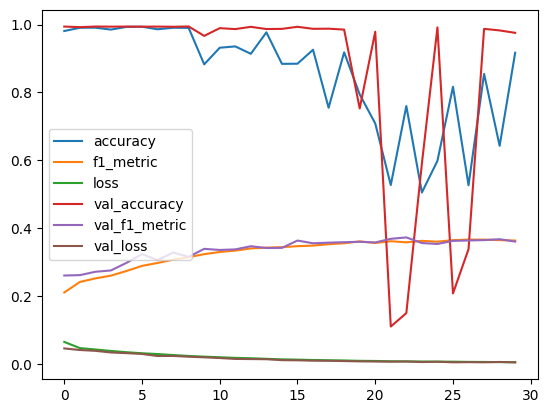

In [24]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [25]:
input_text = vectorizer('You freaking suck! I am going to hit you.')
input_text = np.expand_dims(input_text, axis=-1)  
res = model.predict(input_text)
(res > 0.5).astype(int)
batch_X, batch_y = test.as_numpy_iterator().next()
(model.predict(batch_X) > 0.5).astype(int)
res.shape

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


(1800, 6)

In [26]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

In [29]:
!pip install gradio
import tensorflow as tf
import gradio as gr
import numpy as np

# Save and load the model
model.save('toxicity.h5')
model = tf.keras.models.load_model('toxicity.h5')

input_str = vectorizer('hey i freaken hate you!')
res = model.predict(np.expand_dims(input_str, 0))

# Define the function to score comments
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.5)
    
    return text

# Set up the Gradio interface
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),  # Use gr.Textbox instead of gr.inputs.Textbox
                         outputs='text')

# Launch the interface
interface.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 32.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 98.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.2 MB/s eta 0:00:00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://4ab23082ca68737bc1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
